In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Subset Dataset

In [8]:
dataset_path = './data/subset_dataset_resampled.csv'

ARIMA Model Evaluation:
MSE: 4130.7588, RMSE: 64.2710, MAE: 52.4676, MAPE: 128.0233%, R²: -0.0396

SARIMA Model Evaluation:
MSE: 2709.2084, RMSE: 52.0501, MAE: 40.7338, MAPE: 75.3152%, R²: 0.3181


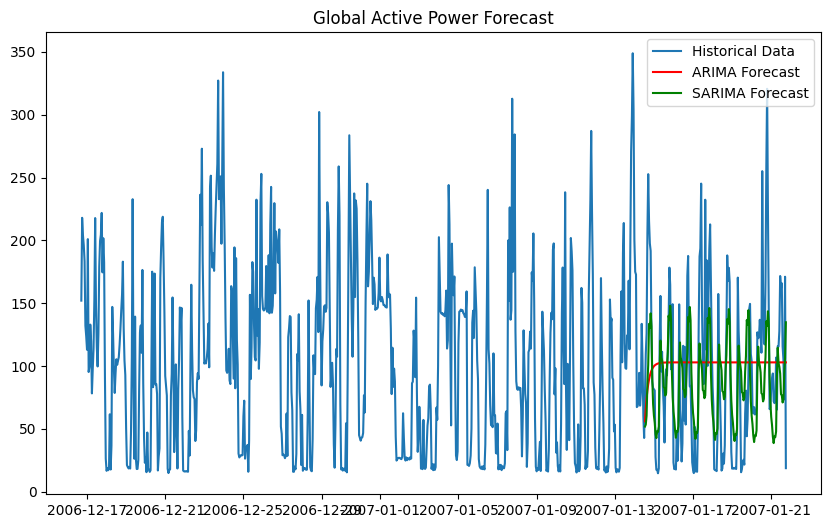

In [9]:
# Step 1: Load the data
df = pd.read_csv(dataset_path, parse_dates=['Datetime'], index_col='Datetime')

# Step 2: Split dataset into training and testing sets (80-20 split)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Step 3: Extract 'Global_active_power' as numpy arrays
train_data = np.array(train['Global_active_power'])
test_data = np.array(test['Global_active_power'])

# Step 4: Fit ARIMA model (adjust (p, d, q) as necessary)
arima_model = ARIMA(train_data, order=(1, 1, 1))  # Example order, you may adjust it based on ACF/PACF
arima_results = arima_model.fit()

# Step 5: Fit SARIMA model (example seasonal order: (1, 1, 1, 24) for seasonal data)
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_results = sarima_model.fit()

# Step 6: ARIMA Forecast
arima_forecast = arima_results.forecast(steps=len(test_data))

# Step 7: SARIMA Forecast
sarima_forecast = sarima_results.get_forecast(steps=len(test_data))
sarima_forecast_mean = sarima_forecast.predicted_mean

# Manually create an index for the forecast to match the test set
forecast_index = test.index

# Step 8: Evaluate model performance (MSE, RMSE, MAE, MAPE, R²)
# ARIMA Evaluation
arima_mse = mean_squared_error(test_data, arima_forecast)
arima_rmse = sqrt(arima_mse)
arima_mae = mean_absolute_error(test_data, arima_forecast)
arima_mape = np.mean(np.abs((test_data - arima_forecast) / test_data)) * 100
arima_r2 = 1 - (np.sum((test_data - arima_forecast)**2) / np.sum((test_data - np.mean(test_data))**2))

# SARIMA Evaluation
sarima_mse = mean_squared_error(test_data, sarima_forecast_mean)
sarima_rmse = sqrt(sarima_mse)
sarima_mae = mean_absolute_error(test_data, sarima_forecast_mean)
sarima_mape = np.mean(np.abs((test_data - sarima_forecast_mean) / test_data)) * 100
sarima_r2 = 1 - (np.sum((test_data - sarima_forecast_mean)**2) / np.sum((test_data - np.mean(test_data))**2))

# Print evaluation metrics
print("ARIMA Model Evaluation:")
print(f"MSE: {arima_mse:.4f}, RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, MAPE: {arima_mape:.4f}%, R²: {arima_r2:.4f}")
print("\nSARIMA Model Evaluation:")
print(f"MSE: {sarima_mse:.4f}, RMSE: {sarima_rmse:.4f}, MAE: {sarima_mae:.4f}, MAPE: {sarima_mape:.4f}%, R²: {sarima_r2:.4f}")

# Step 9: Plot the forecasts
plt.figure(figsize=(10, 6))

# Plot ARIMA forecast
plt.plot(df.index, df['Global_active_power'], label='Historical Data')
plt.plot(forecast_index, arima_forecast, label='ARIMA Forecast', color='red')

# Plot SARIMA forecast
plt.plot(forecast_index, sarima_forecast_mean, label='SARIMA Forecast', color='green')

plt.title('Global Active Power Forecast')
plt.legend()
plt.show()

# Full Dataset

In [10]:
dataset_path = './data/dataset_resampled.csv'

/home/vajradevam/Code/miniproject/VENV/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA Model Evaluation:
MSE: 2815.9877, RMSE: 53.0659, MAE: 46.0057, MAPE: 159.7167%, R²: -0.4743

SARIMA Model Evaluation:
MSE: 2504.0293, RMSE: 50.0403, MAE: 41.1366, MAPE: 136.5210%, R²: -0.3110


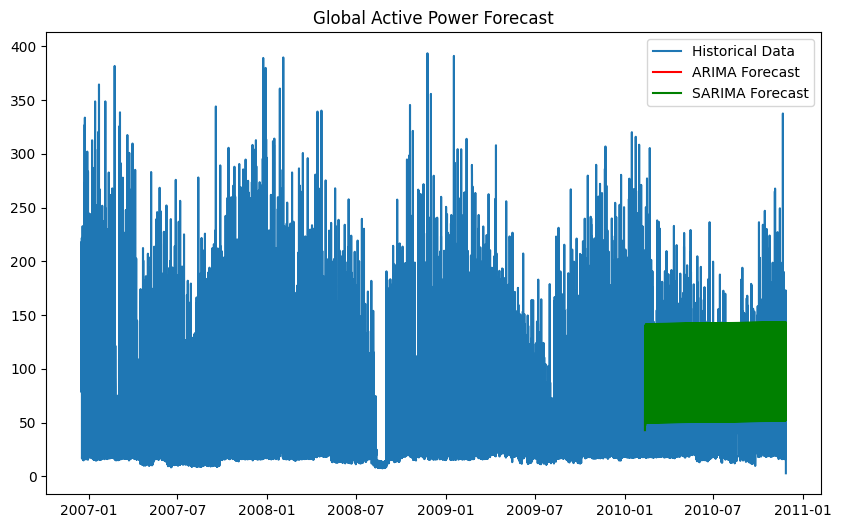

In [11]:
# Step 1: Load the data
df = pd.read_csv(dataset_path, parse_dates=['Datetime'], index_col='Datetime')

# Step 2: Split dataset into training and testing sets (80-20 split)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Step 3: Extract 'Global_active_power' as numpy arrays
train_data = np.array(train['Global_active_power'])
test_data = np.array(test['Global_active_power'])

# Step 4: Fit ARIMA model (adjust (p, d, q) as necessary)
arima_model = ARIMA(train_data, order=(1, 1, 1))  # Example order, you may adjust it based on ACF/PACF
arima_results = arima_model.fit()

# Step 5: Fit SARIMA model (example seasonal order: (1, 1, 1, 24) for seasonal data)
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_results = sarima_model.fit()

# Step 6: ARIMA Forecast
arima_forecast = arima_results.forecast(steps=len(test_data))

# Step 7: SARIMA Forecast
sarima_forecast = sarima_results.get_forecast(steps=len(test_data))
sarima_forecast_mean = sarima_forecast.predicted_mean

# Manually create an index for the forecast to match the test set
forecast_index = test.index

# Step 8: Evaluate model performance (MSE, RMSE, MAE, MAPE, R²)
# ARIMA Evaluation
arima_mse = mean_squared_error(test_data, arima_forecast)
arima_rmse = sqrt(arima_mse)
arima_mae = mean_absolute_error(test_data, arima_forecast)
arima_mape = np.mean(np.abs((test_data - arima_forecast) / test_data)) * 100
arima_r2 = 1 - (np.sum((test_data - arima_forecast)**2) / np.sum((test_data - np.mean(test_data))**2))

# SARIMA Evaluation
sarima_mse = mean_squared_error(test_data, sarima_forecast_mean)
sarima_rmse = sqrt(sarima_mse)
sarima_mae = mean_absolute_error(test_data, sarima_forecast_mean)
sarima_mape = np.mean(np.abs((test_data - sarima_forecast_mean) / test_data)) * 100
sarima_r2 = 1 - (np.sum((test_data - sarima_forecast_mean)**2) / np.sum((test_data - np.mean(test_data))**2))

# Print evaluation metrics
print("ARIMA Model Evaluation:")
print(f"MSE: {arima_mse:.4f}, RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, MAPE: {arima_mape:.4f}%, R²: {arima_r2:.4f}")
print("\nSARIMA Model Evaluation:")
print(f"MSE: {sarima_mse:.4f}, RMSE: {sarima_rmse:.4f}, MAE: {sarima_mae:.4f}, MAPE: {sarima_mape:.4f}%, R²: {sarima_r2:.4f}")

# Step 9: Plot the forecasts
plt.figure(figsize=(10, 6))

# Plot ARIMA forecast
plt.plot(df.index, df['Global_active_power'], label='Historical Data')
plt.plot(forecast_index, arima_forecast, label='ARIMA Forecast', color='red')

# Plot SARIMA forecast
plt.plot(forecast_index, sarima_forecast_mean, label='SARIMA Forecast', color='green')

plt.title('Global Active Power Forecast')
plt.legend()
plt.show()